In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("social_media_users.csv")

# Display the first few rows
print("")
print("First 5 rows:")
print("")
print(df.head())

# Dataset info (structure, types, non-null counts)
print("")
print("")
print("Dataset info:")
print("")
df.info()

# Check for missing values
print("")
print("")
print("Missing values:")
print("")
print(df.isnull().sum())

# Clean the dataset (fill or drop missing values)
df.fillna(df.mean(numeric_only=True), inplace=True)   # Fill numeric NaNs with mean
df.fillna(df.mode().iloc[0], inplace=True)            # Fill categorical NaNs with mode

# Confirm missing values are handled
print("")
print("")
print("Missing values after cleaning:")
print("")
print(df.isnull().sum())
print("")



First 5 rows:

    Platform      Owner                 Primary Usage           Country  \
0   WhatsApp       Meta                     Messaging       Switzerland   
1     WeChat    Tencent    Messaging and social media        Madagascar   
2   Snapchat  Snap Inc.          Multimedia messaging  Pitcairn Islands   
3  Instagram       Meta       Photo and video sharing       Timor-Leste   
4    Threads       Meta  Text-based social networking           Bermuda   

   Daily Time Spent (min) Verified Account Date Joined  
0                  113.94              Yes  2019-03-03  
1                   49.63              Yes  2023-09-21  
2                   29.01              Yes  2020-12-13  
3                  295.43              Yes  2019-04-21  
4                   71.78               No  2015-07-14  


Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------   

In [5]:
# 1 Basic Statistics
print("")
print("")
print("Basic Statistics:")
print("")
print(df.describe())
print("")



Basic Statistics:

       Daily Time Spent (min)
count            10000.000000
mean               152.211145
std                 85.142750
min                  5.020000
25%                 78.920000
50%                152.735000
75%                225.642500
max                300.000000



In [6]:
# 2 group by categorical column and calculate mean
grouped_means = df.groupby("Platform").mean(numeric_only=True)
print("\nMean values grouped by Platform:\n")
print(grouped_means)

# 3. Sort by one of the numetrical matrics to identify patterns
if "Daily Time Spent (min)" in grouped_means.columns:
    sorted_group = grouped_means.sort_values(by="Daily Time Spent (min)", ascending=False)
    print("\n\nGrouped by Platform sorted by Daily Time Spent (min):\n")
    print(sorted_group)


Mean values grouped by Platform:

                      Daily Time Spent (min)
Platform                                    
Facebook                          157.957348
Instagram                         147.377611
LinkedIn                          153.102577
Pinterest                         156.384517
Quora                             148.332460
Reddit                            150.841688
Snapchat                          155.529886
Telegram                          155.287385
Threads                           154.505401
TikTok                            154.715712
WeChat                            149.590458
WhatsApp                          150.347658
X (formerly Twitter)              146.908187
YouTube                           150.419661


Grouped by Platform sorted by Daily Time Spent (min):

                      Daily Time Spent (min)
Platform                                    
Facebook                          157.957348
Pinterest                         156.384517
Snapchat

In [7]:
# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# Loading dataset with error handling
try:
    df = pd.read_csv("social_media_users.csv")
    print("Dataset Loaded Successfully!")
except FileNotFoundError:
    print("Error: File Not Found!")
except Exception as e:
    print(f"An error occured: {e}")

# Cleaning the dataset
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
print("\nDataset Cleaned Successfully!")

Dataset Loaded Successfully!

Dataset Cleaned Successfully!


In [8]:
df.describe(include='all')

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined
count,10000,10000,10000,10000,10000.000000,10000,10000
unique,14,11,13,243,NaN,2,3423
top,Reddit,Meta,Messaging,Congo,NaN,No,2015-07-17
freq,764,2857,1375,82,NaN,5006,10
mean,NaN,NaN,NaN,NaN,152.211145,NaN,NaN
std,NaN,NaN,NaN,NaN,85.142750,NaN,NaN
min,NaN,NaN,NaN,NaN,5.020000,NaN,NaN
25%,NaN,NaN,NaN,NaN,78.920000,NaN,NaN
50%,NaN,NaN,NaN,NaN,152.735000,NaN,NaN
75%,NaN,NaN,NaN,NaN,225.642500,NaN,NaN


In [9]:
top_20_countries = df[['Country', 'Daily Time Spent (min)']].groupby('Country').mean()
top_20_countries = top_20_countries.sort_values(by='Daily Time Spent (min)', ascending=False).head(20)
print(top_20_countries)


                         Daily Time Spent (min)
Country                                        
Pitcairn Islands                     195.005366
Benin                                191.535143
Saint Martin                         188.538824
Mozambique                           186.827447
Tokelau                              183.281463
Palestinian Territory                182.519787
Senegal                              181.362750
Portugal                             178.317391
India                                177.255263
Tajikistan                           176.198491
Poland                               175.525122
Nauru                                174.722333
Montenegro                           174.068148
United Kingdom                       173.699318
Swaziland                            173.308250
Andorra                              172.587692
Fiji                                 171.697925
Samoa                                171.384800
Trinidad and Tobago                  170

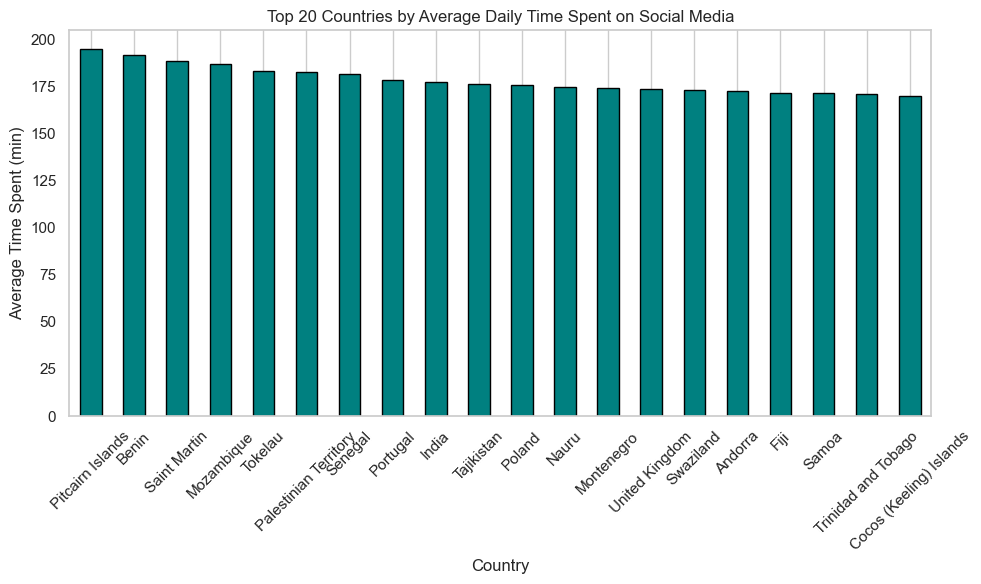

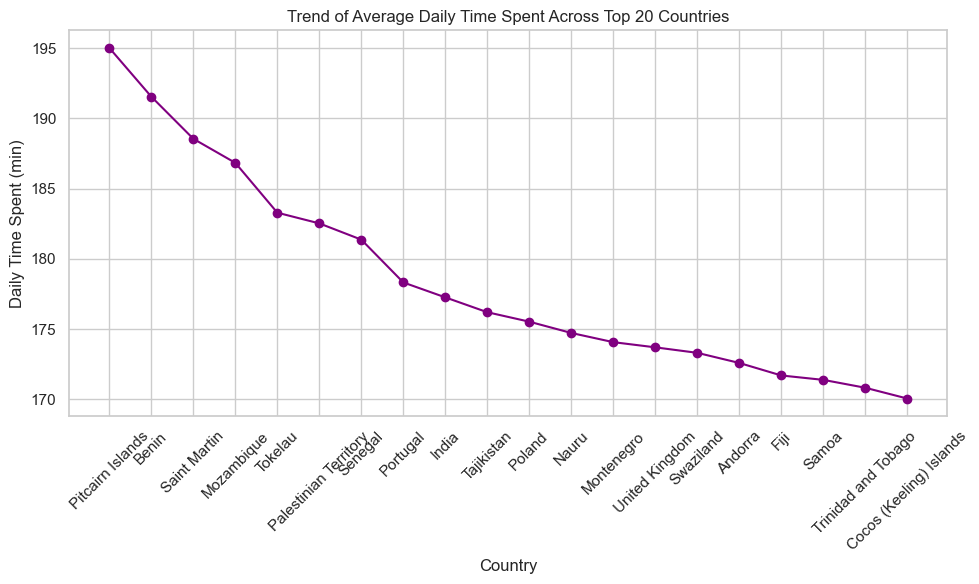

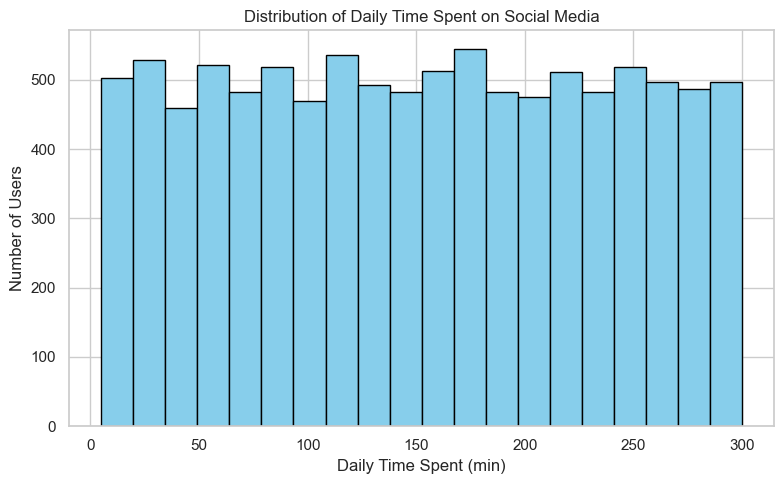

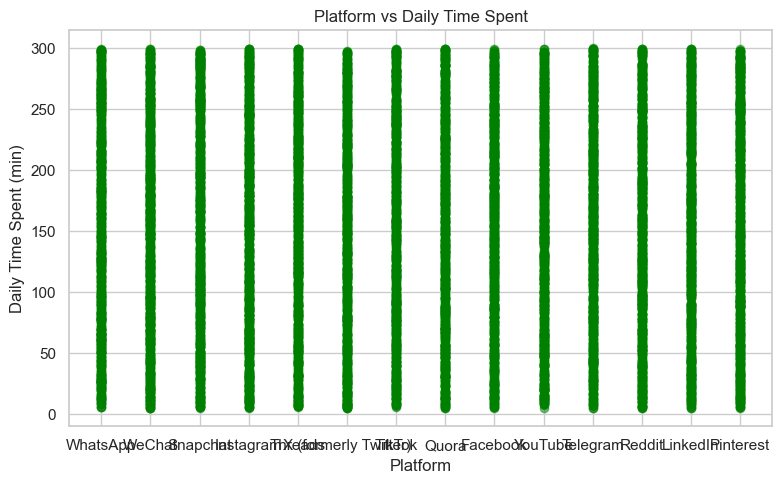

In [12]:
# Visualizing the distribution of Daily Time Spent

import matplotlib.pyplot as plt

top_20_countries = df[['Country', 'Daily Time Spent (min)']].groupby('Country').mean()
top_20_countries = top_20_countries.sort_values(by='Daily Time Spent (min)', ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_20_countries['Daily Time Spent (min)'].plot(kind='bar', color='teal', edgecolor='black')
plt.title('Top 20 Countries by Average Daily Time Spent on Social Media')
plt.xlabel('Country')
plt.ylabel('Average Time Spent (min)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Line chart for top 20 countries

plt.figure(figsize=(10, 6))
plt.plot(top_20_countries.index, top_20_countries['Daily Time Spent (min)'], marker='o', linestyle='-', color='purple')
plt.title('Trend of Average Daily Time Spent Across Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Daily Time Spent (min)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Histogram of Daily Time Spent - All Users

plt.figure(figsize=(8, 5))
plt.hist(df['Daily Time Spent (min)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Time Spent on Social Media')
plt.xlabel('Daily Time Spent (min)')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

# Scatter plot - Platforms vs Daily Time Spent

if 'Platform' in df.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(df['Platform'], df['Daily Time Spent (min)'], color='green', alpha=0.5)
    plt.title('Platform vs Daily Time Spent')
    plt.xlabel('Platform')
    plt.ylabel('Daily Time Spent (min)')
    plt.tight_layout()
    plt.show()
else:
    print("No 'Platform' column found in dataset.")

